In [8]:
import tools.file as tf
import drawwithplt as Dplt
Dplt.plt.style.use(["science","grid"])

c:\Users\LIFTES-NONET\Anaconda3\envs\py3.7\lib\site-packages\ipykernel_launcher.py:41: UserWarning: AutoMinorLocator does not work with logarithmic scale


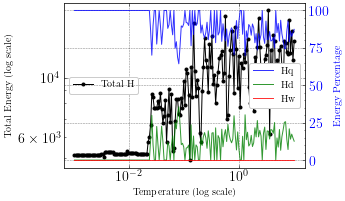

In [23]:
def plot_temp_data(temp_data_list):
    # 提取数据
    temperatures = [data['temperature'] for data in temp_data_list]
    Hqs = [data['current_h_list']['Hq'] for data in temp_data_list]
    Hds = [data['current_h_list']['Hd'] for data in temp_data_list]
    Hws = [data['current_h_list']['Hw'] for data in temp_data_list]
    total_Hs = [data['current_energy'] for data in temp_data_list]

    # 计算每种能量占总能量的百分比
    Hq_percentage = [100 * Hq / total_H for Hq, total_H in zip(Hqs, total_Hs)]
    Hd_percentage = [100 * Hd / total_H for Hd, total_H in zip(Hds, total_Hs)]
    Hw_percentage = [100 * Hw / total_H for Hw, total_H in zip(Hws, total_Hs)]

    # 设置图形
    fig, ax1 = Dplt.SetSubFig(1,1,(5,3))

    # 左纵轴绘制总能量，并使用对数坐标
    ax1.set_xlabel('Temperature (log scale)')
    ax1.set_ylabel('Total Energy (log scale)', color='black')
    ax1.plot(temperatures, total_Hs, '.-', color='black', label="Total H")
    # ax1.set_ylim(2000,50000)
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.tick_params(axis='y', labelcolor='black')

    # 创建与ax1共享x轴的第二个坐标系
    ax2 = ax1.twinx()

    # 右纵轴绘制能量百分比
    alpha = 0.8
    ax2.set_ylabel('Energy Percentage', color='blue')
    ax2.plot(temperatures, Hq_percentage, '-', color='blue', label="Hq", alpha=alpha)
    ax2.plot(temperatures, Hd_percentage, '-', color='green', label="Hd", alpha=alpha)
    ax2.plot(temperatures, Hw_percentage, '-', color='red', label="Hw", alpha=alpha)
    ax2.tick_params(axis='y', labelcolor='blue')
    
    # 总能量的图例放在左上角，其余放在图的外部
    ax1.legend(loc='center left')
    ax2.legend(loc='center right')

    Dplt.plt.tight_layout()  # 确保图例和标签不会重叠

# 使用方法
data = tf.Load_data("Result/SA/test_result.pkl")
plot_temp_data(data)
